# Forecasting

In this assignment, we will explore the python package [statsmodels](http://www.statsmodels.org/dev/tsa.html) to forecast the time series data. You will learn to use different time series modeling technique for forecasting.

Learning Objectives:

- Decompose time series into autocorrelation, seasonality, trend, and noise. 
- Explain the effects of exponential smoothing models and differentiate them from other models.
- Apply and evaluate the results of an autoregressive model. 
- Apply and evaluate the results of a moving average model. 
- Apply and evaluate the results of an autoregressive integrated moving average model.
- Apply and evaluate the results of ARIMA model for forecasting (time series prediction).


In [1]:
# # install packages
# import sys
# !pip3 install --prefix {sys.prefix} statsmodels

In [4]:
import numpy as np
import pandas as pd
from matplotlib import pyplot
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from math import sqrt
import warnings
warnings.filterwarnings('ignore')

----------

## Air Passenger Dataset
This dataset provides monthly totals of international airline passengers from 1949 to 1960. You can find a copy of the dataset on [Kaggle](https://www.kaggle.com/rakannimer/air-passengers) or [R datasets](https://stat.ethz.ch/R-manual/R-devel/library/datasets/html/AirPassengers.html).

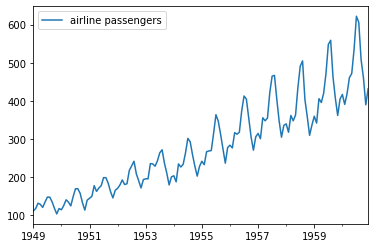

In [5]:
df = pd.read_csv('./airline-passengers.csv', index_col=[0], parse_dates=True)
df.index = pd.DatetimeIndex(df.index.values, freq=df.index.inferred_freq)

# split the data into train and test
train, test = df.iloc[:130, [0]], df.iloc[130:, [0]]

df.plot()
pyplot.show()

Question 1.1: Using [seasonal_decompose](https://www.statsmodels.org/stable/generated/statsmodels.tsa.seasonal.seasonal_decompose.html) API from `statsmodels.tsa.seasonal`, apply additive decomposition to the airline passenger dataset and plot each components from the decomposition.

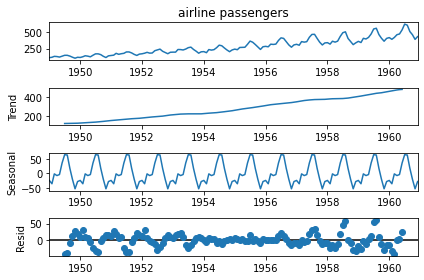

In [6]:
# additive decomposition
from statsmodels.tsa.seasonal import seasonal_decompose

result = seasonal_decompose(df['airline passengers'], model='additive')
result.plot()
pyplot.show()

Question 1.2: Using [seasonal_decompose](https://www.statsmodels.org/stable/generated/statsmodels.tsa.seasonal.seasonal_decompose.html) API from `statsmodels.tsa.seasonal`, apply multiplication decomposition to the same airline passenger dataset and plot each components from the decomposition. Which decomposition makes more sense in this dataset? 

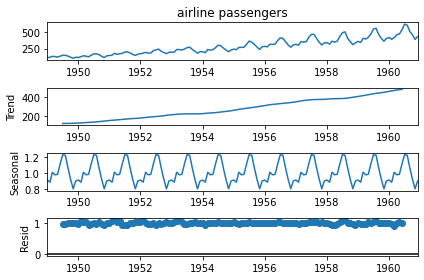

In [7]:
# multiplicative decomposition
from statsmodels.tsa.seasonal import seasonal_decompose

result = seasonal_decompose(df['airline passengers'], model='multiplicative')
result.plot()
pyplot.show()

----------

Question 2.1: Apply the simple exponential smoothing technique ([SimpleExpSmoothing](https://www.statsmodels.org/dev/generated/statsmodels.tsa.holtwinters.SimpleExpSmoothing.html) API) to the airline dataset and report the prediction accuracy (RMSE and MAE) on the test dataset. Try to play around with the hyper-parameter `smoothing_level` and see how it impacts the model accuracy. 

In [8]:
from statsmodels.tsa.holtwinters import SimpleExpSmoothing

# fit model
model = SimpleExpSmoothing(train['airline passengers'].astype(np.float))
model_fit = model.fit(smoothing_level=0.8)
# make prediction
z = model_fit.predict(start=test.index[0], end=test.index[-1])
print(z)

print("rmse:" + str(sqrt(mean_squared_error(test, z))))
print("mae:" + str(mean_absolute_error(test, z)))

1959-11-01    421.812195
1959-12-01    421.812195
1960-01-01    421.812195
1960-02-01    421.812195
1960-03-01    421.812195
1960-04-01    421.812195
1960-05-01    421.812195
1960-06-01    421.812195
1960-07-01    421.812195
1960-08-01    421.812195
1960-09-01    421.812195
1960-10-01    421.812195
1960-11-01    421.812195
1960-12-01    421.812195
Freq: MS, dtype: float64
rmse:86.92637222764058
mae:62.09825789699543


----------

Question 2.2: Apply the HWES technique ([ExponentialSmoothing](https://www.statsmodels.org/dev/generated/statsmodels.tsa.holtwinters.ExponentialSmoothing.html) API) to the airline dataset and report the prediction accuracy (RMSE and MAE) on the test dataset. Try to play around with the hyper-parameters in the API and see how it impacts the model accuracy. 

In [9]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing

# fit model
model = ExponentialSmoothing(train['airline passengers'].astype(np.float))
model_fit = model.fit()

# make prediction
z = model_fit.predict(start=test.index[0], end=test.index[-1])
print(z)

print("rmse:" + str(sqrt(mean_squared_error(test, z))))
print("mae:" + str(mean_absolute_error(test, z)))

1959-11-01    407.000001
1959-12-01    407.000001
1960-01-01    407.000001
1960-02-01    407.000001
1960-03-01    407.000001
1960-04-01    407.000001
1960-05-01    407.000001
1960-06-01    407.000001
1960-07-01    407.000001
1960-08-01    407.000001
1960-09-01    407.000001
1960-10-01    407.000001
1960-11-01    407.000001
1960-12-01    407.000001
Freq: MS, dtype: float64
rmse:94.8348183095322
mae:67.35714249951499


-----

Question 3.1: Apply Autoregression model ([AR](http://www.statsmodels.org/stable/generated/statsmodels.tsa.ar_model.AR.html) API) to the airline dataset and report the prediction accuracy (RMSE and MAE) on the test dataset. Try to play around with the hyper-parameters in the API and see how it impacts the model accuracy. 

In [10]:
# AR example
from statsmodels.tsa.ar_model import AR
from random import random

# fit model
p = 2
model = AR(train['airline passengers'].astype(np.float))
model_fit = model.fit(maxlag=1)

# make prediction
z = model_fit.predict(start=test.index[0], end=test.index[-1])
print(z)

print("rmse:" + str(sqrt(mean_squared_error(test, z))))
print("mae:" + str(mean_absolute_error(test, z)))

1959-11-01    402.885833
1959-12-01    398.950202
1960-01-01    395.185359
1960-02-01    391.583893
1960-03-01    388.138714
1960-04-01    384.843040
1960-05-01    381.690383
1960-06-01    378.674537
1960-07-01    375.789565
1960-08-01    373.029787
1960-09-01    370.389770
1960-10-01    367.864319
1960-11-01    365.448460
1960-12-01    363.137439
Freq: MS, dtype: float64
rmse:116.30643311322542
mae:87.59486797063452


----------

Question 3.2: Apply Moving Average model ([ARMA](https://www.statsmodels.org/stable/generated/statsmodels.tsa.arima_model.ARIMA.html) API) to the airline dataset and report the prediction accuracy (RMSE and MAE) on the test dataset. Try to play around with the hyper-parameters in the API and see how it impacts the model accuracy. 

In [11]:
# MA example
from statsmodels.tsa.arima_model import ARMA

# fit model
model = ARMA(train['airline passengers'].astype(np.float), order=(0, 1))
model_fit = model.fit()

# make prediction
z = model_fit.predict(start=test.index[0], end=test.index[-1])
print(z)

print("rmse:" + str(sqrt(mean_squared_error(test, z))))
print("mae:" + str(mean_absolute_error(test, z)))

1959-11-01    333.580913
1959-12-01    260.510231
1960-01-01    260.510231
1960-02-01    260.510231
1960-03-01    260.510231
1960-04-01    260.510231
1960-05-01    260.510231
1960-06-01    260.510231
1960-07-01    260.510231
1960-08-01    260.510231
1960-09-01    260.510231
1960-10-01    260.510231
1960-11-01    260.510231
1960-12-01    260.510231
Freq: MS, dtype: float64
rmse:214.8506099778822
mae:197.1990061836593


----------

Questio 4.1: Apply Moving Average model ([ARMA](https://www.statsmodels.org/stable/generated/statsmodels.tsa.arima_model.ARIMA.html) API) to the airline dataset and report the prediction accuracy (RMSE and MAE) on the test dataset. Try to play around with the hyper-parameters in the API and see how it impacts the model accuracy. 

In [12]:
# ARMA example
from statsmodels.tsa.arima_model import ARMA

# fit model
model = ARMA(train['airline passengers'].astype(np.float), order=(2, 1))
model_fit = model.fit()

# make prediction
z = model_fit.predict(start=test.index[0], end=test.index[-1])
print(z)

print("rmse:" + str(sqrt(mean_squared_error(test, z))))
print("mae:" + str(mean_absolute_error(test, z)))

1959-11-01    396.572855
1959-12-01    391.285797
1960-01-01    383.826001
1960-02-01    378.028892
1960-03-01    371.842708
1960-04-01    366.326626
1960-05-01    360.897845
1960-06-01    355.842036
1960-07-01    350.987254
1960-08-01    346.404326
1960-09-01    342.036849
1960-10-01    337.896578
1960-11-01    333.960175
1960-12-01    330.223696
Freq: MS, dtype: float64
rmse:135.04368836423086
mae:107.42957656450994


----------

Question 4.2: Apply Moving Average model ([ARIMA](https://www.statsmodels.org/stable/generated/statsmodels.tsa.arima_model.ARIMA.html) API) to the airline dataset and report the prediction accuracy (RMSE and MAE) on the test dataset. Try to play around with the hyper-parameters in the API and see how it impacts the model accuracy. 

In [13]:
# ARIMA example
from statsmodels.tsa.arima_model import ARIMA

# fit model
model = ARIMA(train['airline passengers'].astype(np.float), order=(2, 1, 1))
model_fit = model.fit(disp=False)

# make prediction
z = model_fit.predict(start=test.index[0], end=test.index[-1], typ='levels')
print(z)

print("rmse:" + str(sqrt(mean_squared_error(test, z))))
print("mae:" + str(mean_absolute_error(test, z)))

1959-11-01    388.133575
1959-12-01    396.410085
1960-01-01    415.818781
1960-02-01    433.886703
1960-03-01    444.976133
1960-04-01    449.134875
1960-05-01    449.210062
1960-06-01    448.276830
1960-07-01    448.270600
1960-08-01    449.773285
1960-09-01    452.458684
1960-10-01    455.683257
1960-11-01    458.908295
1960-12-01    461.866525
Freq: MS, dtype: float64
rmse:73.09260461003228
mae:51.123912190831824


Question 5: After running through various time series models, summarize your findings. 